## Logistic Regression and Naive Bayes
---

## Logistic Regression
----
* Perfect fo questions with a binary outcome
* Go to Classifier
* Binary outcome is the likelihood of a feature

Logistic Regression creates **Decision Boundaries** that separate the data into possiblities of the binary outcome

\begin{align}
\log_{likelihood} = \beta_1X_1 + \beta_2X_2 ... + \beta_nX_n 
\end{align}

### Hypothesis Representation
----
In order to get $\theta$ <= h(x) <= 1:

	h(x) = g(Θ' * x)
	g(x) = 1 / (1 + e^(-x)) # sigmoid function or logistic function

If $\theta$ <= h(x) <= 1, can be looked at as the probability of _y = 1_ on input _x_.

	x = [x0 x1] = [1 feature]
	h(x) = 0.7
##### then tell the {person} there is a 70% chance of {Feature} being {thing}


### Decision Boundary
---

Suppose there are two possible predictions: y = {0, 1}. 

Based on the function _g(x)_, _h(x)_ will be 0.5 when _x = 0_, where _x = Θ' * x_. :

	predict "y=1" if h(x) ≥ 0.5
	predict "y=0" if h(x) ≤ 0.5 (less than)

**Decision boundary** is the name given to the line/plane that divides the categories that we are trying to classify. 
This is a property of the hypothesis function _h(x)_; 
        **Not of the data set.**


That means it is the plane generated by the hypothesis function. 

Whenever `Θ' * x >= 0`, then we are predicting `y=1`. 
On the other hand, when `Θ' * x < 0` then we are predicting `y=0`.


### Loss/Cost Function
----

$h = g( \theta^\intercal X)$

The cost function used for linear regression is not a good choice for logistic regression. 

The Logit function causes it to be non-convex. 

Running gradient descent in a non-convex function can converge to a local minimum that is different than the global minimum.


### Gradient Descent
----
* Minimizing the loss function by increasing/decreasing the weights
    * Done by taking the derivative of the loss function with respect to each weight
    
* This is multiplied by the learning rate and subtracted from the weights

### What the Predictions Really mean
----
By Taking the sigmoid of each input, we get the probablilty it is in a classification. 

Probabilities greater than or equal to 0.5 are class 1, the remainder are class 0

### Starting With a small example
----

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("../data/loan_knn.csv")

In [3]:
df.tail()

,Gender,Age,Salary,Default
395,F,51,43730,1
396,M,56,25730,1
397,F,55,22730,1
398,M,41,35730,0
399,F,54,38730,1


#### Notice the `Default` column

In [4]:
df.Default.value_counts()

0    257
1    143
Name: Default, dtype: int64

#### Map the features to `X` map the Binary Outcome to `Y`
----

In [5]:
X = df[["Gender", "Age", "Salary"]]
y = df["Default"]

### Data Preprocessing
----

#### Make the Lists of the numerical/categorical columns
----

In [6]:
numerical_variable = ["Age", "Salary"]
categorical_variable = ["Gender"]

#### Import the necessary tools
----


In [7]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Instantiate the Pipelines
----

In [8]:
numerical_transformer = Pipeline(steps=[
    ("missing_value", SimpleImputer(strategy="mean")),
    ("scaling", StandardScaler())
])

In [9]:
categorical_transformer = Pipeline(steps=[
    ("missing_value", SimpleImputer(strategy="most_frequent")),
    ("encoding", OneHotEncoder(sparse=False))
])

In [10]:
preprocessor = ColumnTransformer(transformers=[
    ('numerical_transformer', numerical_transformer, numerical_variable),
    ('categorical_transformer', categorical_transformer, categorical_variable)
])

### Import the `LogisticRegression` Class
----

##### Build the `model` pipeline

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('logistic_model', LogisticRegression())
])

### Split the Data into Training and Test

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

### Fit the Model and Run Predictions
----

In [15]:
model.fit(X_train, y_train)

C:\Users\Tommy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('preprocess', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('numerical_transformer', Pipeline(memory=None,
     steps=[('missing_value', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy=...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

In [16]:
y_pred = model.predict(X_test)

In [17]:
y_pred_prob = model.predict_proba(X_test)[: , 1]

### Evaluating the Model
----

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
accuracy_score(y_test, y_pred)

0.875

### Charting with Reciever Operating Characeristics
----
Plotting the True Positive and False Positive Rates 

ROC curves plot the ability of a binary classifier to function as the threshold is varied

In [62]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

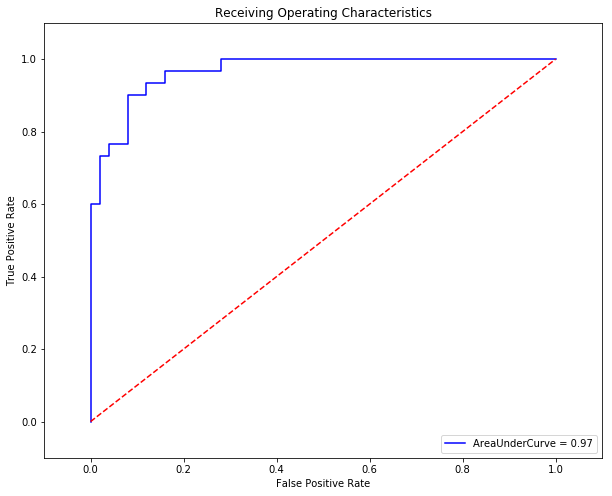

In [63]:
plt.figure(figsize=(10,8))
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AreaUnderCurve = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Evaluating with a Confusion Matrix
----

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
# T |
# R |
# U |
# E |
# ----------------
#   | PREDICTED

array([[46,  4],
       [ 6, 24]], dtype=int64)

In [65]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[47  3]
 [10 20]]


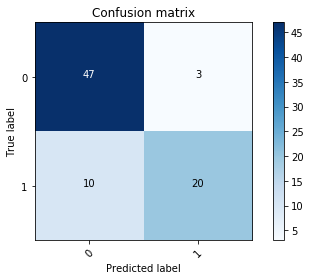

In [24]:
plot_confusion_matrix(cm, df.Default.unique())

In [25]:
df.Default.unique()

array([0, 1], dtype=int64)

## Naive Bayes
----
Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets.


Because they are so fast and have so few tunable parameters, they end up being very useful as a quick-and-dirty baseline for a classification problem.

### Bayesian Classification
----
Naive Bayes classifiers are built on conditional probabilities of statistical quantities.

In Bayesian classification, we're finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.



Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$

If we are trying to decide between two labels—let's call them $L_1$ and $L_2$—then one way to make this decision is to compute the ratio of the posterior probabilities for each label:

$$
\frac{P(L_1~|~{\rm features})}{P(L_2~|~{\rm features})} = \frac{P({\rm features}~|~L_1)}{P({\rm features}~|~L_2)}\frac{P(L_1)}{P(L_2)}
$$



We need to compute $P({\rm features}~|~L_i)$ for each label.

This *generative model* specifies the hypothetical random process to generate the data.


Specifying this generative model for each label is the main piece of the training of such a Bayesian classifier.

we can make it simpler through the use of some simplifying assumptions about the form of this model.


If we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each 

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
df = pd.read_csv("../data/loan_knn.csv")

### Make Sure the DataFrame from before hasn't been mutated
----
* If so reimport the csv

In [28]:
df.head()

,Gender,Age,Salary,Default
0,M,24,21730,0
1,M,40,22730,0
2,F,31,45730,0
3,F,32,59730,0
4,M,24,78730,0


* Actually Reimport the CSV to get practice with

### Preprocessing and Data Pipelines
----

#### Assign `X` and `Y` and create your variable mapping
----

In [29]:
X = df[["Gender", "Age", "Salary"]]
y = df["Default"]

In [30]:
numerical_variable = ["Age", "Salary"]
categorical_variable = ["Gender"]

##### Don't forget to import your toolset

In [31]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### Create the transformer  `Pipeline` instance variables
----

In [32]:
numerical_transformer = Pipeline(steps=[
    ("missing_value", SimpleImputer(strategy="mean"))
])

In [33]:
categorical_transformer = Pipeline(steps=[
    ("missing_value", SimpleImputer(strategy="most_frequent")),
    ("encoding", OneHotEncoder(sparse=False))
])

In [34]:
preprocessor = ColumnTransformer(transformers=[
    ('munerical_transformer', numerical_transformer, numerical_variable),
    ('categorical_transformer', categorical_transformer, categorical_variable)
])

### Gaussian Naive Bayes
---
Simplest naive Bayes classifier to understand is Gaussian naive Bayes.
In this classifier, the assumption is that *data from each label is drawn from a simple **Gaussian distribution***.

In [35]:
from sklearn.naive_bayes import GaussianNB

Doing this is a fast way to create a model, because it can be fit by finding the mean and the standard deviation of each labels points. 

The `GaussianNB` class performs all these steps to compute the likelihood of $P({\rm features}~|~L_1)$ for a point. 

## Build the `model` pipeline
----

In [36]:
model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('nb_model', GaussianNB() )
])

#### Split your data to fit it
----

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

#### `fit` your data

In [39]:
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('preprocess', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('munerical_transformer', Pipeline(memory=None,
     steps=[('missing_value', SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy=...=None, sparse=False))]), ['Gender'])])), ('nb_model', GaussianNB(priors=None, var_smoothing=1e-09))])

In [40]:
y_pred = model.predict(X_test)

#### Calculate the probabalistic classification 

In [41]:
y_pred_prob = model.predict_proba(X_test)[: , 1]

Columns give the posterior probabilities of the labels. 

### Import `accuracy_score` to check the model
----

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test, y_pred)

0.875

### Plot the `ROC`, `AUC`, and `confusion matrices`
----

In [44]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
auc_score = roc_auc_score(y_test, y_pred_prob)

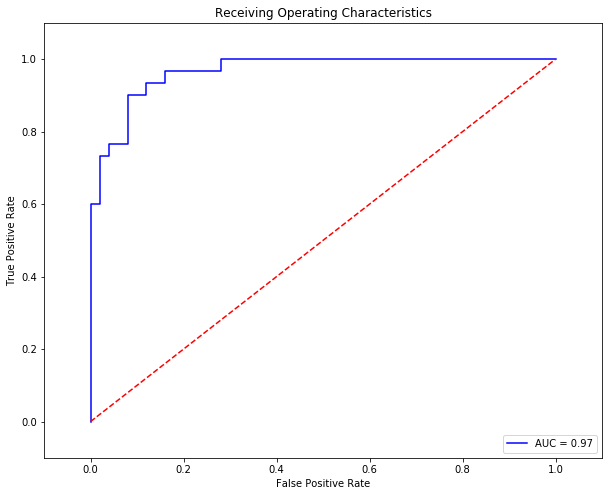

In [45]:
plt.figure(figsize=(10,8))
plt.title('Receiving Operating Characteristics')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%auc_score)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[46,  4],
       [ 6, 24]], dtype=int64)

In [47]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[46  4]
 [ 6 24]]


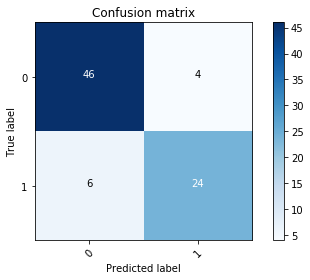

In [48]:
plot_confusion_matrix(cm, df.Default.unique())

### Multinomial Naive Bayes
---
Assumes features are generated from a simple multinomial distribution.

The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.


https://github.com/jakevdp/PythonDataScienceHandbook.git

### Classifying Text
----
Features are related to word counts or frequencies within the documents to be classified.

* use the sparse word count features from the 20 Newsgroups corpus to show how we might classify these short documents into categories.


In [49]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [50]:
categories = ['comp.sys.ibm.pc.hardware', 'sci.crypt',
              'sci.space', 'talk.politics.misc']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [51]:
train.data[3]

"From: smb@research.att.com (Steven Bellovin)\nSubject: Re: Clipper chip -- technical details\nOrganization: AT&T Bell Laboratories\nLines: 20\n\nIn article <1667.Apr1821.58.3593@silverton.berkeley.edu>, djb@silverton.berkeley.edu (D. J. Bernstein) writes:\n> Short summary of what Bellovin says Hellman says the NSA says: There is\n> a global key G, plus one key U_C for each chip C. The user can choose a\n> new session key K_P for each phone call P he makes. Chip C knows three\n> keys: G, its own U_C, and the user's K_P. The government as a whole\n> knows G and every U_C. Apparently a message M is encrypted as\n> E_G(E_{U_C}(K_P),C) , E_{K_P}(M). That's it.\n> \n> The system as described here can't possibly work. What happens when\n> someone plugs the above ciphertext into a receiving chip? To get M\n> the receiving chip needs K_P; to get K_P the receiving chip needs U_C.\n> The only information it can work with is C. If U_C can be computed\n> from C then the system is cryptographically

In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers.


For this we will use  *term frequency-inverse document frequency* (*TF–IDF*) which weights the word counts by a measure of how often they appear in the documents., and create a pipeline that attaches it to a multinomial naive Bayes classifier:

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

### `fit` and `predict` the model
----

In [53]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Predicted the labels for the test data, can be evaluated  to learn about the performance of the estimator.

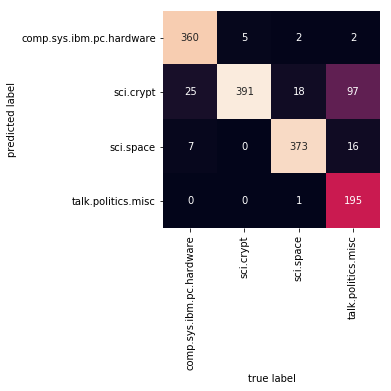

In [54]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [55]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Let's try it out:

In [56]:
predict_category('sending a payload to the ISS')

'sci.space'

In [57]:
predict_category('SHA')

'sci.crypt'

In [58]:
predict_category('black holes')

'sci.space'

### Applications of Naive Bayes
----
Naive Bayesian classifiers have strick assumptions, they do not perform as well as a more complicated model.
That said, they have several advantages:

* Speed in training and prediction
* Straightforward probabilistic prediction
* Easy to interpret
* Few (if any) tunable parameters



These advantages mean a naive Bayesian classifier is often a good choice as an initial baseline classification.

If it performs suitably, then congratulations: you have a very fast, very interpretable classifier for your problem.

If it does not perform well, then you can begin exploring more sophisticated models, with some baseline knowledge of how well they should perform.



Clusters in high dimensions tend to be more separated, on average, than clusters in low dimensions

Simplistic classifiers like naive Bayes tend to work as well or better than more complicated classifiers as the dimensionality grows: once you have enough data, even a simple model can be very powerful.